# **Coupon Recommendation**

## **Problem Statement**

#### This dataset was collected through a survey conducted on the Ecom website using Amazon Mechanical Turk. It presents various driving scenarios that include details such as the driver’s destination, weather conditions, passengers, coupon type, and personal attributes. Based on these situations, each participant was asked whether they would accept the offered coupon or not.

## **Objective**
### The main objective of this project is to predict whether a customer will accept a coupon based on various contextual and personal factors. By analyzing features such as destination, weather, passenger, and coupon type, we aim to understand the key factors influencing coupon acceptance and use this understanding to build an accurate machine learning model.

## **Business Understanding**

### In the real world, companies often use coupons or discount offers to attract customers and boost sales. However not everyone accepts these offers. Some people might take the coupon right away while others might ignore it depending on their mood, destination or situation. By studying what influences a person’s decision to accept or reject a coupon businesses can create smarter and more personalized marketing strategies that reach the right people at the right time.

## Importing Required Libraries

In [2]:
# Basic Libraries for handling data and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Pre-modeling requirements
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score

## Loading Dataset

In [3]:
df = pd.read_csv('DS_DATA.csv')
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


## Exploratory Data Analysis (EDA)

In [4]:
# Making a copy of our original dataset
data = df.copy()

In [5]:
data.shape

(12684, 25)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

***We can see that there are many missing values, most of the features are object.***

In [7]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


***We can see that for toCoupon_GEQ5min column the mean is 1 and std is 0 it has a single value i.e for all observations the value is 1. So we will drop this column***

In [8]:
data.drop('toCoupon_GEQ5min', inplace= True, axis= 1)

In [9]:
# Checking columns names
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

***Our target variable is 'Accept(Y/N?)' we will rename it as 'Target'***

In [10]:
data.rename(columns= {'Accept(Y/N?)': 'Target'}, inplace= True)

In [11]:
# Checking duplicate observations
data.duplicated().sum()

np.int64(291)

***There are 291 duplicate observations we have to drop it***

In [12]:
data.drop_duplicates(inplace= True)

In [13]:
# Checking missing values
np.round((data.isnull().sum() / len(data) * 100).sort_values(ascending= False), 2)

,0
car,99.14
CoffeeHouse,1.73
Restaurant20To50,1.52
CarryAway,1.19
RestaurantLessThan20,1.03
Bar,0.86
destination,0.00
passanger,0.00
age,0.00
gender,0.00


- ***The column car has 99.14% missing values so it is appropriate to drop this column.***
- ***The columns CoffeeHouse, Restaurant20To50, CarryAway, RestaurantLessThan20 and Bar have missing values less than 2%, so we will impute these missing values. As this columns are having dataype as object we will impute it by mode***

In [14]:
# Imputing missing values with mode as all are categorical features
data.drop('car', axis= 1, inplace= True)
columns_with_missing = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']
for col in columns_with_missing:
    data[col].fillna(data[col].mode()[0], inplace= True)

In [15]:
# Checking unique values in each column
for col in data:
    print(col, ':', data[col].unique())
    print()

destination : ['No Urgent Place' 'Home' 'Work']

passanger : ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

weather : ['Sunny' 'Rainy' 'Snowy']

temperature : [55 80 30]

coupon : ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

expiration : ['1d' '2h']

gender : ['Female' 'Male']

age : ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

maritalStatus : ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

has_children : [1 0]

education : ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

occupation : ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Off

- ***Major columns having dtype as 'object', so we have to do encoding.***
- ***Even columns like temperature and age have a few unique values, hence these columns should also be logically treated as categorical.***

In [16]:
# Checking columns with highest cardinality for each datatype
max_int = -1
max_obj = -1
int_mc = None
obj_mc = None
for col in data.columns:
    if data[col].dtypes=='int64':
        if data[col].nunique()>max_int:
            int_mc = col
            max_int = data[col].nunique()
    if data[col].dtypes==object:
        if data[col].nunique()>max_obj:
            obj_mc = col
            max_obj = data[col].nunique()

print(f"Integer Column {int_mc} has highest cardinality of {max_int}")
print(f'Cat column {obj_mc} has highest cardinality of {max_obj}')

Integer Column temperature has highest cardinality of 3
Cat column occupation has highest cardinality of 25


- ***Since our data is small columns like occupation with cardinality of 25 can cause curse of dimensionality if one hot coded.***

In [17]:
# Checing count of target variable
np.round(data['Target'].value_counts()/ len(data) * 100, 2)

,count
Target,
1,56.58
0,43.42


- ***We have more data on Accepted coupons than rejected coupons. We don't suffer from severe class imbalance.***

In [18]:
# Check correlation of numerical features
data.select_dtypes(exclude= 'object').corr()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Target
temperature,1.000000,-0.016963,-0.141124,-0.230067,0.088885,-0.088885,0.064074
has_children,-0.016963,1.000000,0.078686,-0.011651,-0.032276,0.032276,-0.044889
toCoupon_GEQ15min,-0.141124,0.078686,1.000000,0.321919,-0.297284,0.297284,-0.086050
toCoupon_GEQ25min,-0.230067,-0.011651,0.321919,1.000000,-0.190759,0.190759,-0.107855
direction_same,0.088885,-0.032276,-0.297284,-0.190759,1.000000,-1.000000,0.016356
direction_opp,-0.088885,0.032276,0.297284,0.190759,-1.000000,1.000000,-0.016356
Target,0.064074,-0.044889,-0.086050,-0.107855,0.016356,-0.016356,1.000000


- ***Feature direction_opp has strong negative correlation with direction_same, obviously if one has value 1 other will have 0. Also they have weak correlation with target variable so will drop one.***

In [19]:
data.drop('direction_opp', axis= 1, inplace= True)

## Univariate Analysis

In [20]:
def percent_value_counts(data, feature):
    counts = data.groupby(feature).Target.agg(Total_Count= 'count', Accepted= 'sum').reset_index()
    counts['Rejected'] = counts['Total_Count'] - counts['Accepted']
    counts['Total_%'] = round(counts['Total_Count'] / counts['Total_Count'].sum() * 100, 2)
    counts['%Accepted'] = round(counts['Accepted'] / counts['Total_Count'] * 100, 2)
    counts['%Rejected'] = round(counts['Rejected'] / counts['Total_Count'] * 100, 2)
    return counts

def univariate_analysis(df, feature):
    df_EDA = percent_value_counts(df, feature)
    df_EDA = df_EDA.sort_values(by= 'Total_Count', ascending= False)

    x = np.arange(len(df_EDA[feature]))
    width = 0.25

    plt.figure(figsize =(10, 5))
    plt.bar(x - width, df_EDA['Total_Count'], width, label= 'Total')
    plt.bar(x, df_EDA['Accepted'], width, label= 'Accepted')
    plt.bar(x + width, df_EDA['Rejected'], width, label= 'Rejected')

    plt.title(f'{feature} — Total, Accepted, and Rejected')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(x, df_EDA[feature], rotation= 45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return df_EDA

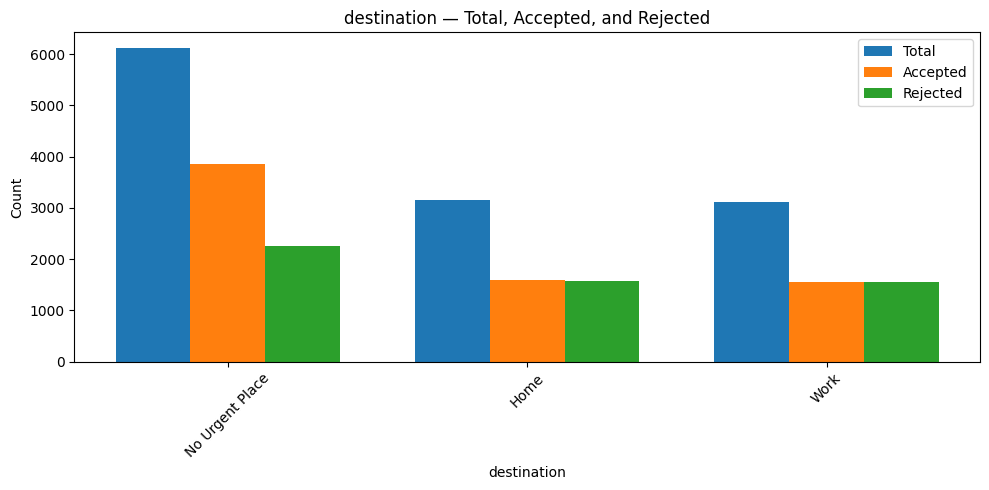

,destination,Total_Count,Accepted,Rejected,Total_%,%Accepted,%Rejected
1,No Urgent Place,6118,3865,2253,49.37,63.17,36.83
0,Home,3161,1594,1567,25.51,50.43,49.57
2,Work,3114,1553,1561,25.13,49.87,50.13


In [21]:
univariate_analysis(data, 'destination')

- ***Most of the users have destination No Urgent Place and have accepted more coupons.***  
- ***The users who have destinations Home and Work have almost similar coupon acceptance ratios.***

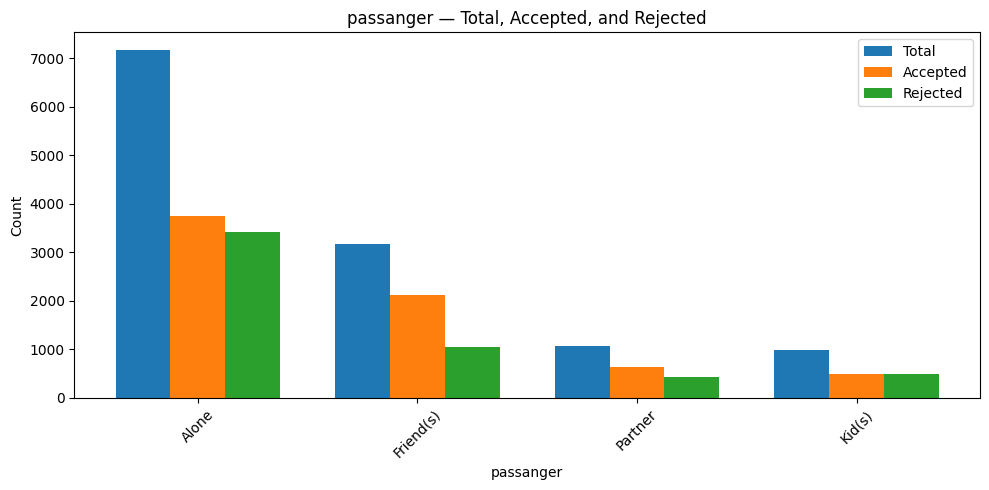

,passanger,Total_Count,Accepted,Rejected,Total_%,%Accepted,%Rejected
0,Alone,7178,3760,3418,57.92,52.38,47.62
1,Friend(s),3166,2127,1039,25.55,67.18,32.82
3,Partner,1068,634,434,8.62,59.36,40.64
2,Kid(s),981,491,490,7.92,50.05,49.95


In [22]:
univariate_analysis(data, 'passanger')

- ***Most of the users travelling are alone.***
- ***If a user have friends with him, he is more likely(more than two times) to accept the coupons.***
- ***Users travelling with Friends and Partner have more coupon acceptance ratio than Alone.***  


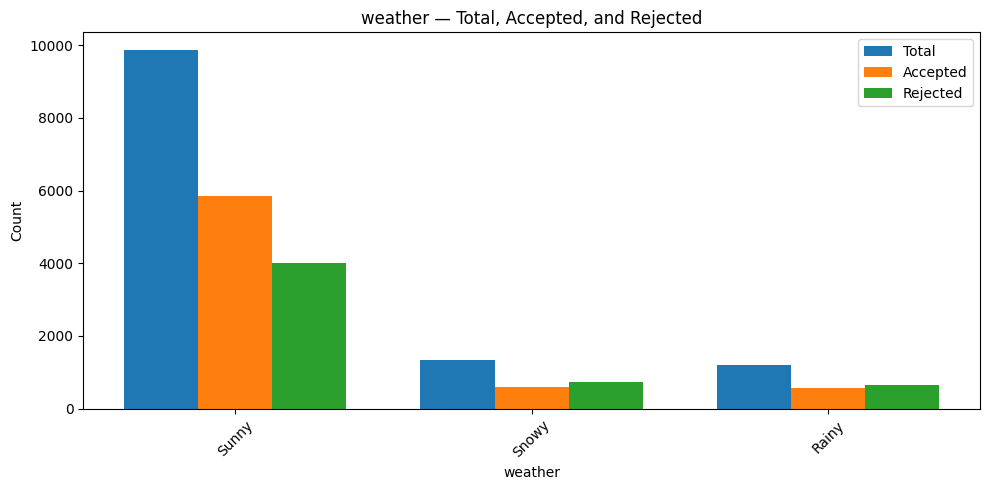

,weather,Total_Count,Accepted,Rejected,Total_%,%Accepted,%Rejected
2,Sunny,9862,5850,4012,79.58,59.32,40.68
1,Snowy,1329,605,724,10.72,45.52,54.48
0,Rainy,1202,557,645,9.70,46.34,53.66


In [23]:
univariate_analysis(data, 'weather')

- ***If the weather is sunny, its more probable (almost 1.5 times ) to accept a coupon, Also, the survey has been done mainly on sunny day***

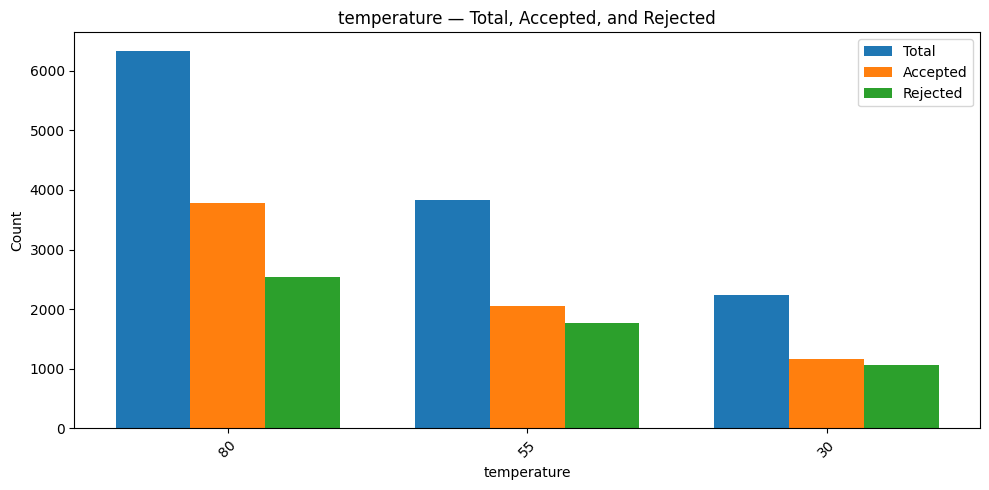

,temperature,Total_Count,Accepted,Rejected,Total_%,%Accepted,%Rejected
2,80,6328,3786,2542,51.06,59.83,40.17
1,55,3828,2055,1773,30.89,53.68,46.32
0,30,2237,1171,1066,18.05,52.35,47.65


In [24]:
univariate_analysis(data, 'temperature')

- ***Coupon acceptance ratio is high in high temperature zone***

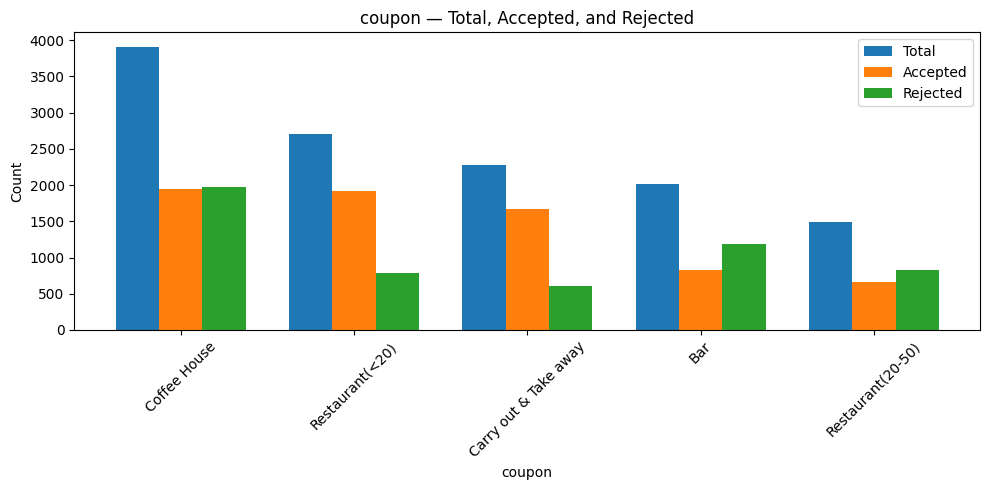

,coupon,Total_Count,Accepted,Rejected,Total_%,%Accepted,%Rejected
2,Coffee House,3913,1943,1970,31.57,49.65,50.35
4,Restaurant(<20),2708,1924,784,21.85,71.05,28.95
1,Carry out & Take away,2275,1665,610,18.36,73.19,26.81
0,Bar,2010,824,1186,16.22,41.00,59.00
3,Restaurant(20-50),1487,656,831,12.00,44.12,55.88


In [25]:
univariate_analysis(data, 'coupon')

- ***Acceptance of coupon for rest<20 is almost double where as for expensive (rest (20-50)) its more likely to not accept the coupons.***
- ***Maximum coupons accepted by users are Carry out & Take away and Restaurant(<20) coupons.***
- ***For coffee-house its almost 50-50 chance to accept a coupon.***
- ***Bar coupon has very low acceptance ratio.***

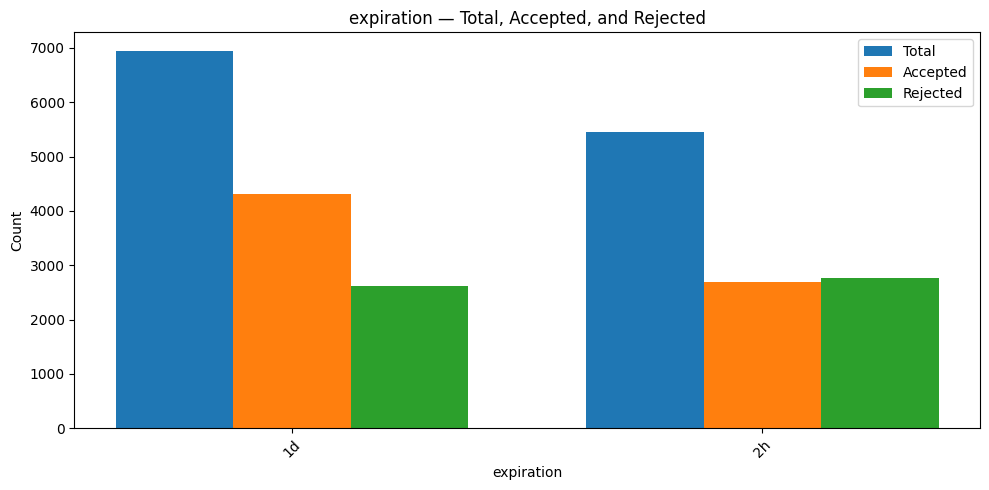

,expiration,Total_Count,Accepted,Rejected,Total_%,%Accepted,%Rejected
0,1d,6938,4317,2621,55.98,62.22,37.78
1,2h,5455,2695,2760,44.02,49.40,50.60


In [26]:
univariate_analysis(data, 'expiration')

- ***Its quite obvious the coupons having more expiration time will be using more, so users are more likely to accept coupons which have much longer expiration rather than the shorter ones.***

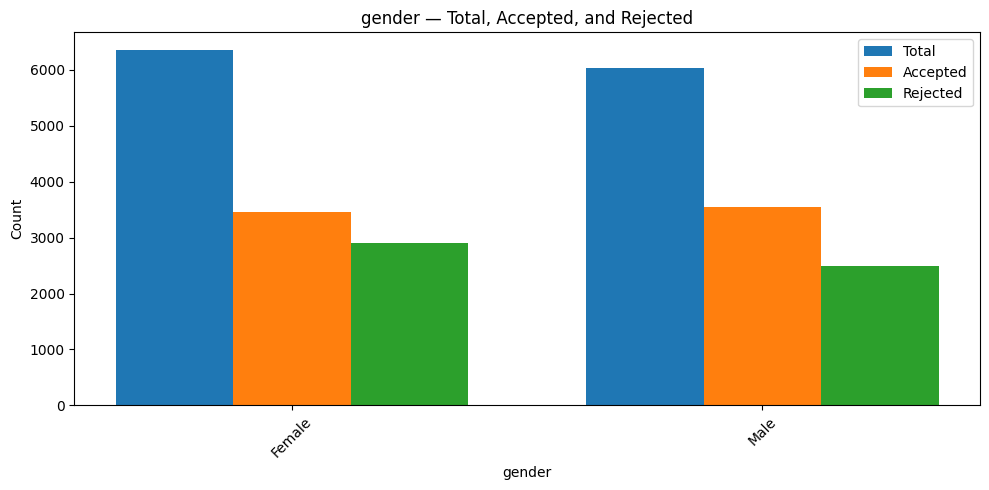

,gender,Total_Count,Accepted,Rejected,Total_%,%Accepted,%Rejected
0,Female,6355,3460,2895,51.28,54.45,45.55
1,Male,6038,3552,2486,48.72,58.83,41.17


In [27]:
univariate_analysis(data, 'gender')

- ***Male users have slightly more acceptance ration than female customers.***

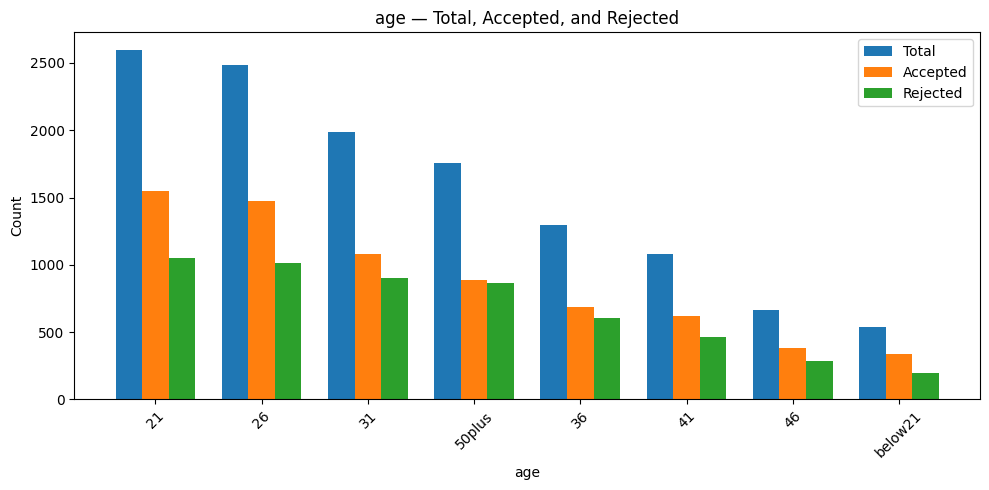

,age,Total_Count,Accepted,Rejected,Total_%,%Accepted,%Rejected
0,21,2598,1549,1049,20.96,59.62,40.38
1,26,2486,1475,1011,20.06,59.33,40.67
2,31,1984,1079,905,16.01,54.39,45.61
6,50plus,1756,888,868,14.17,50.57,49.43
3,36,1293,687,606,10.43,53.13,46.87
4,41,1079,618,461,8.71,57.28,42.72
5,46,660,378,282,5.33,57.27,42.73
7,below21,537,338,199,4.33,62.94,37.06


In [28]:
univariate_analysis(data, 'age')

- ***Age between 21 to 26 have the max no of acceptance of coupons. They are the major target of this business according to the survey.***
- ***Almost every age group they are accepting coupons.***
- ***Users below age 21 have highest coupon acceptance ratio***

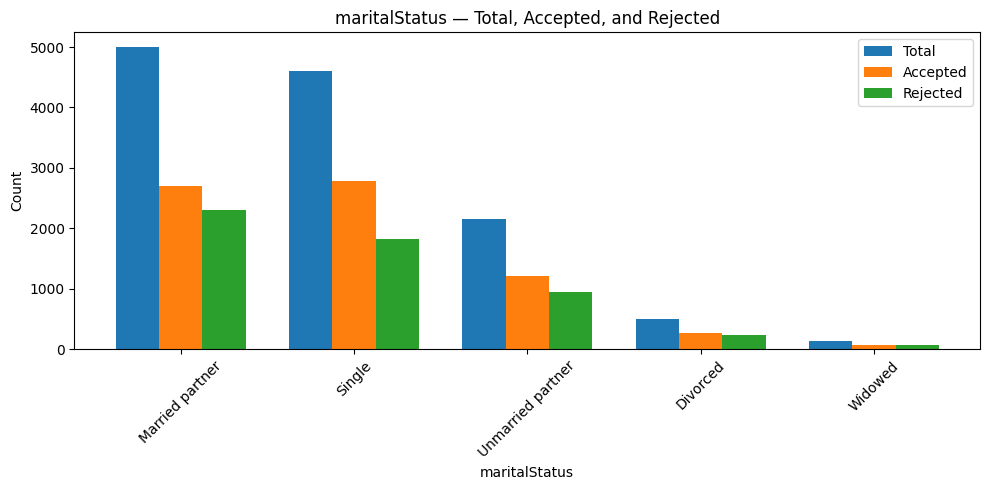

,maritalStatus,Total_Count,Accepted,Rejected,Total_%,%Accepted,%Rejected
1,Married partner,4994,2697,2297,40.30,54.00,46.00
2,Single,4610,2784,1826,37.20,60.39,39.61
3,Unmarried partner,2155,1203,952,17.39,55.82,44.18
0,Divorced,505,266,239,4.07,52.67,47.33
4,Widowed,129,62,67,1.04,48.06,51.94


In [29]:
univariate_analysis(data, 'maritalStatus')

- ***Most users in this data are Single or have Married partner.***
- ***Single users accept more coupons than others.***

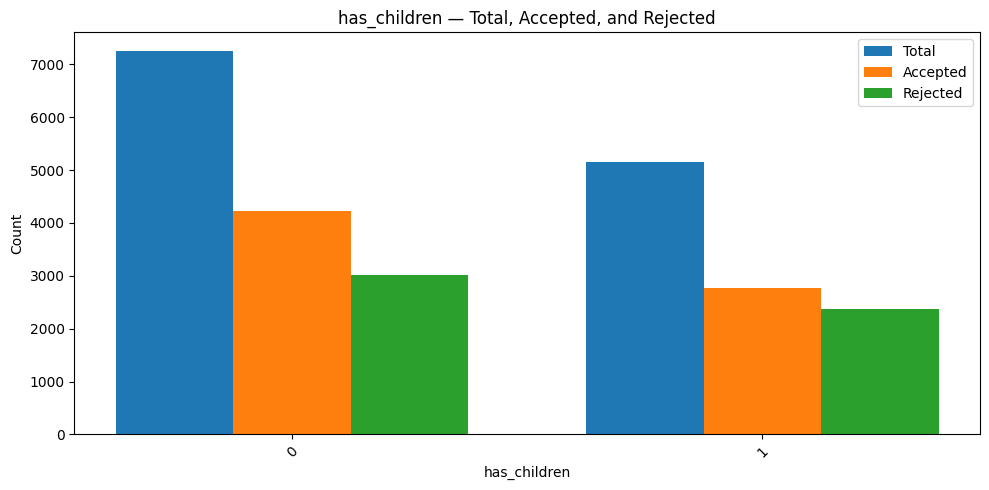

,has_children,Total_Count,Accepted,Rejected,Total_%,%Accepted,%Rejected
0,0,7243,4234,3009,58.44,58.46,41.54
1,1,5150,2778,2372,41.56,53.94,46.06


In [30]:
univariate_analysis(data, 'has_children')

- ***Users who dont have children are more likely to accept a coupon.***

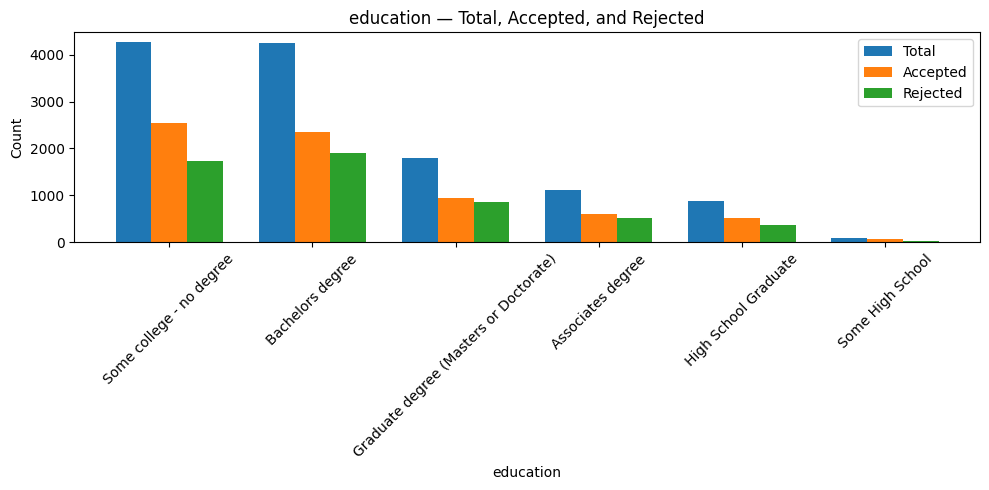

,education,Total_Count,Accepted,Rejected,Total_%,%Accepted,%Rejected
5,Some college - no degree,4260,2534,1726,34.37,59.48,40.52
1,Bachelors degree,4247,2344,1903,34.27,55.19,44.81
2,Graduate degree (Masters or Doctorate),1793,939,854,14.47,52.37,47.63
0,Associates degree,1126,614,512,9.09,54.53,45.47
3,High School Graduate,880,519,361,7.10,58.98,41.02
4,Some High School,87,62,25,0.70,71.26,28.74


In [31]:
univariate_analysis(data, 'education')

- ***Most users have at least a Bachelor's degree or Some college - no degree.***
- ***In this data, very few users have only Some High School education
 and those users have the highest coupon acceptance ratio.***
-  ***Users who have a Graduate degree (Masters or Doctorate) have the least coupon acceptance ratio.***

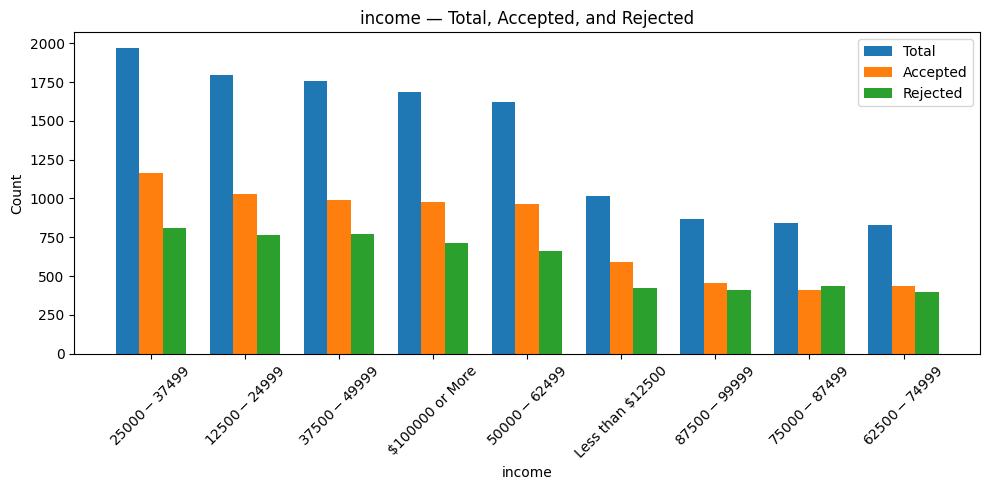

,income,Total_Count,Accepted,Rejected,Total_%,%Accepted,%Rejected
2,$25000 - $37499,1972,1165,807,15.91,59.08,40.92
1,$12500 - $24999,1795,1029,766,14.48,57.33,42.67
3,$37500 - $49999,1760,987,773,14.20,56.08,43.92
0,$100000 or More,1688,974,714,13.62,57.70,42.30
4,$50000 - $62499,1624,964,660,13.10,59.36,40.64
8,Less than $12500,1013,593,420,8.17,58.54,41.46
7,$87500 - $99999,865,456,409,6.98,52.72,47.28
6,$75000 - $87499,844,407,437,6.81,48.22,51.78
5,$62500 - $74999,832,437,395,6.71,52.52,47.48


In [32]:
univariate_analysis(data, 'income')

- ***Most of the cutomers have a income range between 12500 and 62499.***
- ***Users having low and high income range are accepting more coupons.***

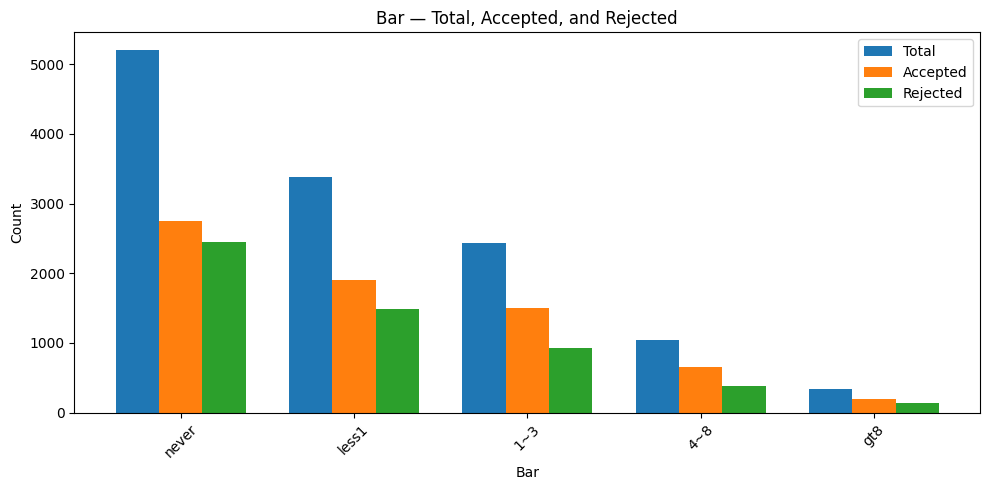

,Bar,Total_Count,Accepted,Rejected,Total_%,%Accepted,%Rejected
4,never,5195,2745,2450,41.92,52.84,47.16
3,less1,3383,1902,1481,27.30,56.22,43.78
0,1~3,2432,1508,924,19.62,62.01,37.99
1,4~8,1045,661,384,8.43,63.25,36.75
2,gt8,338,196,142,2.73,57.99,42.01


In [33]:
univariate_analysis(data, 'Bar')

- ***Users who dont visit a bar are more but the chances of accepting coupon is 50-50.***
- ***Users frequently visiting bar accept more coupons.***

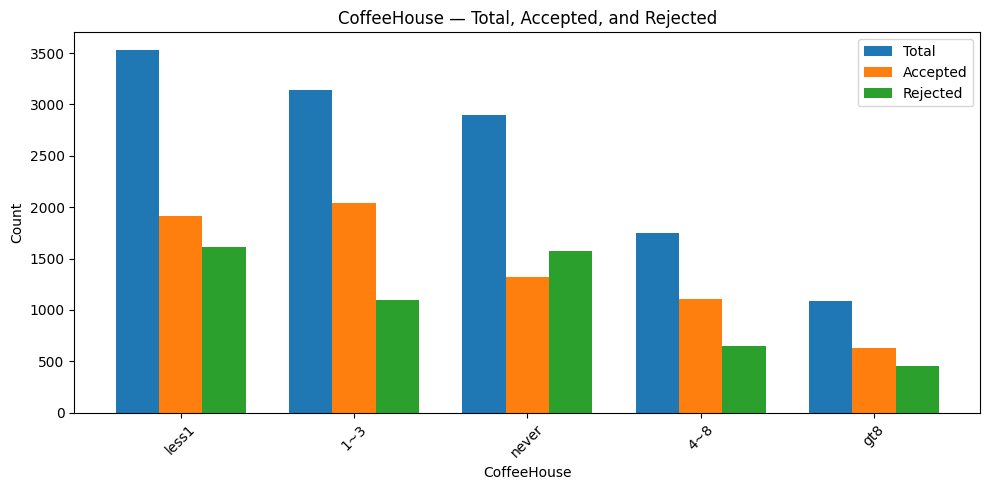

,CoffeeHouse,Total_Count,Accepted,Rejected,Total_%,%Accepted,%Rejected
3,less1,3525,1911,1614,28.44,54.21,45.79
0,1~3,3138,2044,1094,25.32,65.14,34.86
4,never,2895,1319,1576,23.36,45.56,54.44
1,4~8,1752,1107,645,14.14,63.18,36.82
2,gt8,1083,631,452,8.74,58.26,41.74


In [34]:
univariate_analysis(data, 'CoffeeHouse')

- ***Users who visit CoffeeHouse frequently they are more likely to accept a coupon.***

# Bivariate Analysis

In [35]:
# We'll need a temporary copy as we wanna make some changes to data
temp = data.copy()

In [36]:
def plot_bivariate(f1, f2, rotate_ticks= False, deg= 90):

    temp['feature_comb'] = temp[f1].astype('str') + ' & ' + temp[f2].astype('str')
    sns.countplot(x= 'feature_comb',hue= 'Target',data= temp)
    plt.xlabel("Combination of {} & {}".format(f1,f2))
    plt.title("Effect of {} & {} on target variable".format(f1,f2))
    plt.ylabel("Count")
    if rotate_ticks:
        plt.xticks(rotation= deg)
    plt.legend(labels= ['Rejected','Accepted'])
    plt.show()


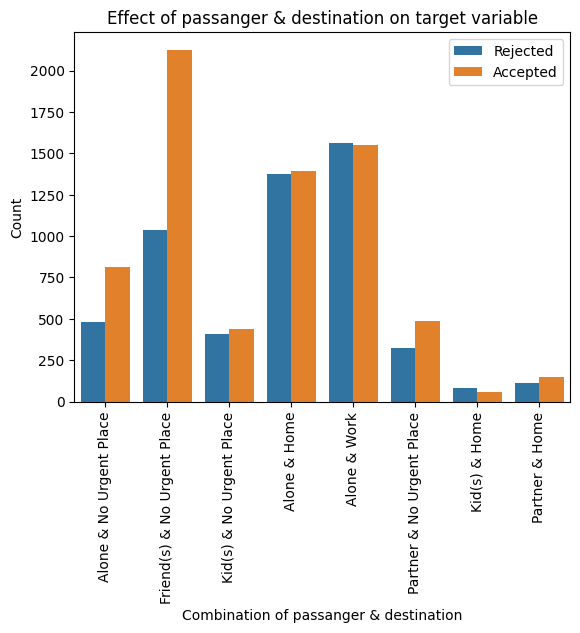

In [37]:
plot_bivariate('passanger', 'destination', rotate_ticks= True, deg= 90)

- ***Coupon acceptance is most if users are with friends and have no urgent place to go to.***
- ***It is also high if users are alone or with partner but there destination should be no urgent place.***

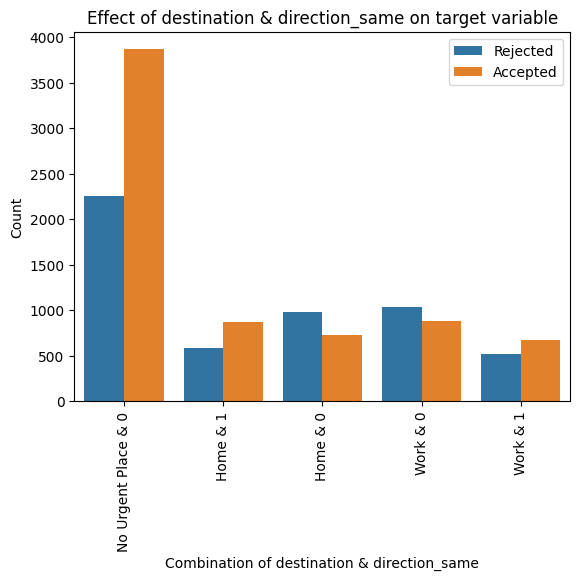

In [38]:
plot_bivariate('destination', 'direction_same',rotate_ticks= True, deg= 90)

- ***As already seen above if users have no urgent place to go they are accepting the coupons even if they are moving in opposite direction of the coupon venue.***
- ***Interestingly if users are in the same direction of the venue irrespective of whether they are headed to work or home then they are more likley to accept the coupon as compared to if they are moving in opposite direction.***

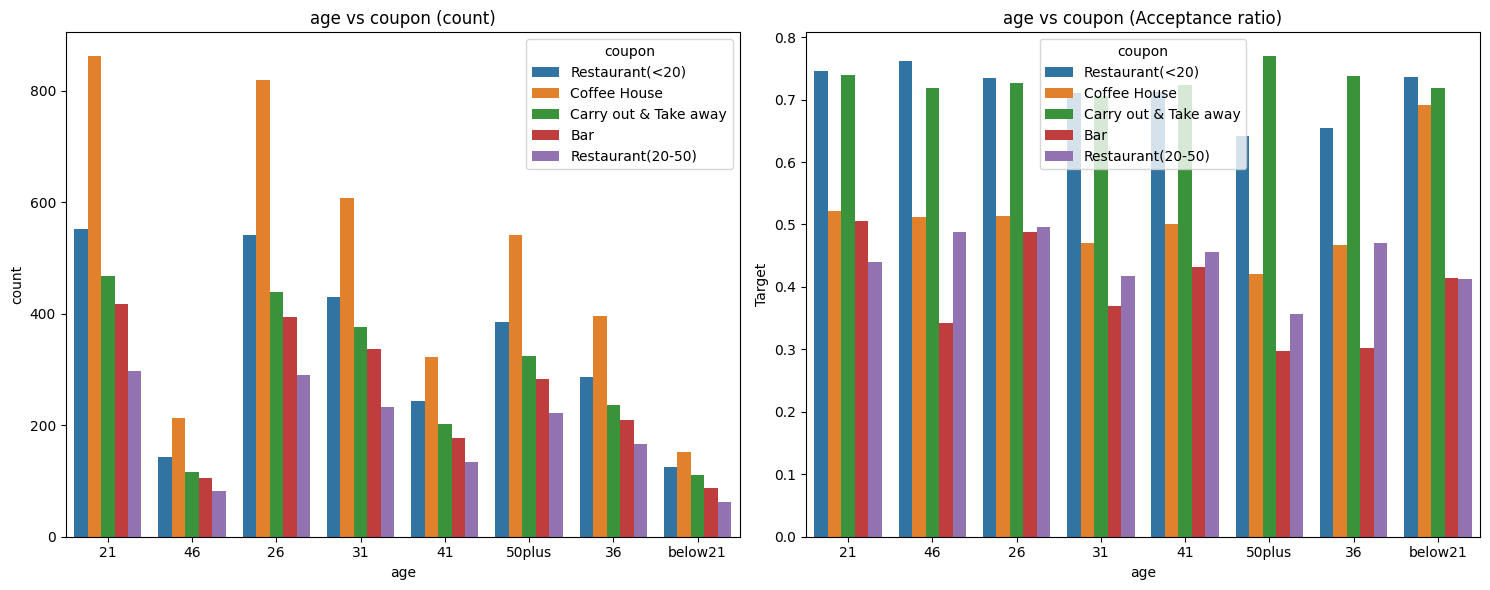

In [39]:
fig,axes = plt.subplots(1, 2, figsize= (15, 6))
sns.countplot(x= 'age', hue= 'coupon', data= data, ax= axes[0])
sns.barplot(ax= axes[1], x= "age", y= "Target", hue= 'coupon', ci= None, data= data)
axes[0].set_title('age vs coupon (count)')
axes[1].set_title('age vs coupon (Acceptance ratio)')
plt.tight_layout()
plt.show()

- ***For Bar coupons, 21 and 26 age users accept the coupon more than others.***
- ***Mostly every age users accept Carry out & Take away and Restaurant(<20) coupons.***
- ***Older age users have least acceptance for Bar Coupons.***

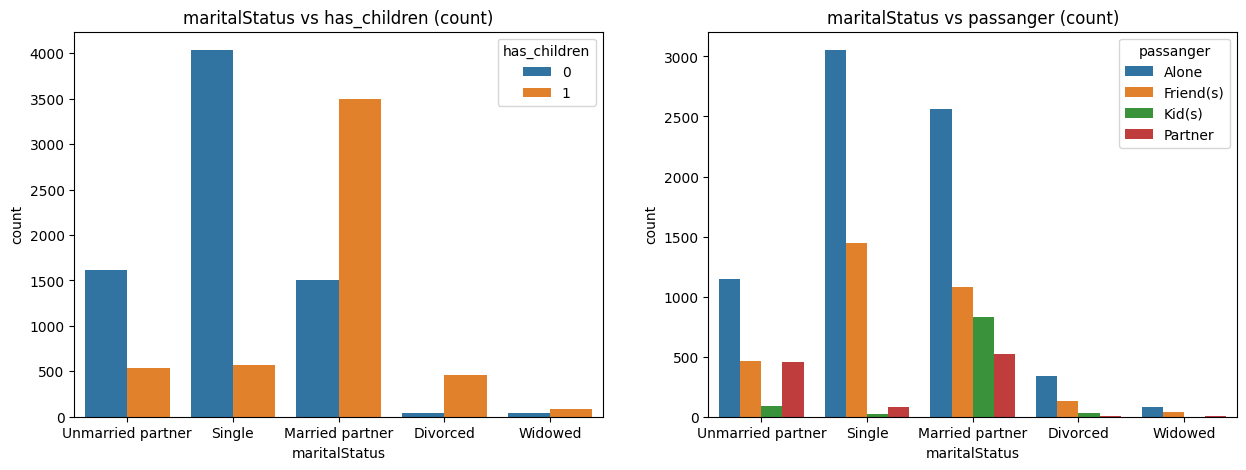

In [40]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x= 'maritalStatus', hue= 'has_children', data= data, ax= axes[0])
sns.countplot(x= 'maritalStatus', hue= 'passanger', data= data, ax= axes[1])
axes[0].set_title('maritalStatus vs has_children (count)')
axes[1].set_title('maritalStatus vs passanger (count)')
plt.show()

- ***A single users always goes Alone or with Friends.***
- ***Mostly Married and Divorced users have children.***
- ***Generally kids are going out with married Users mostly.***
- ***Widowed users have children but never travel with kid.***

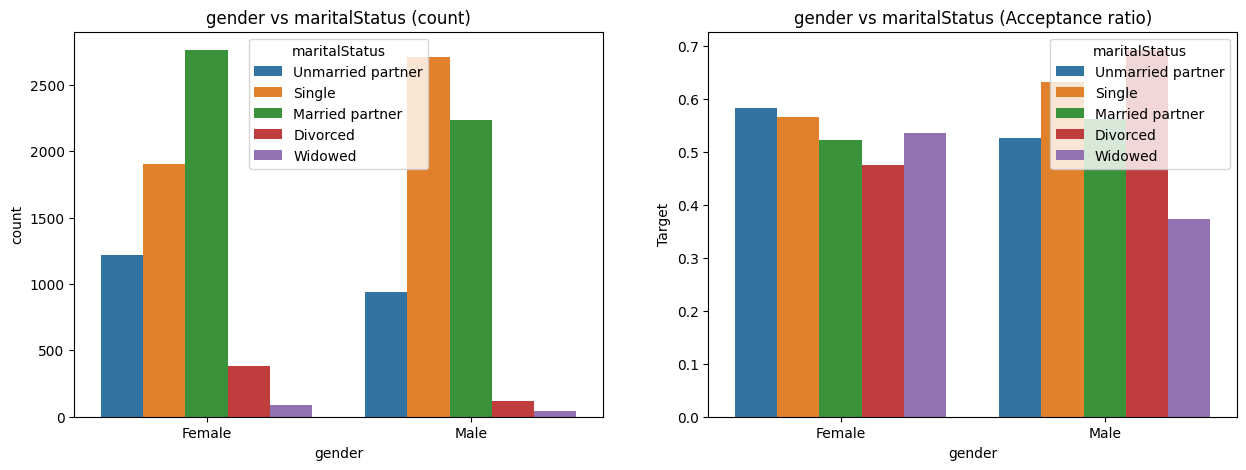

In [41]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x= 'gender', hue= 'maritalStatus', data= data, ax= axes[0])
sns.barplot(ax=axes[1], x= "gender", y= "Target", hue= 'maritalStatus', ci= None, data= data)
axes[0].set_title('gender vs maritalStatus (count)')
axes[1].set_title('gender vs maritalStatus (Acceptance ratio)')
plt.show()

- ***Most Male users are Single, and most Female users are Married.***
- ***Single Male users have a coupon acceptance percentage is approx 63%.***
- ***Divorced Male users have a coupon acceptance ratio is approx 69%.***

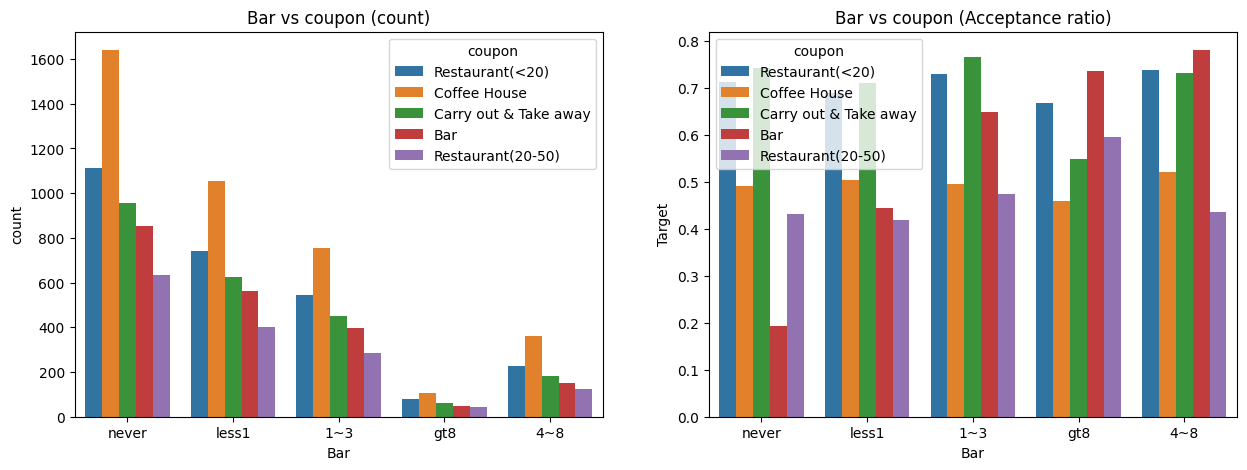

In [42]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x= 'Bar', hue= 'coupon', data= data, ax= axes[0])
sns.barplot(x= "Bar", y= "Target", hue= 'coupon', ci= None, data= data, ax= axes[1])
axes[0].set_title('Bar vs coupon (count)')
axes[1].set_title('Bar vs coupon (Acceptance ratio)')
plt.show()

- ***Users who have already been in Bar 4 to 8 time or more than 8 times has a maximum acceptance ratio for Bar coupons.***
- ***Users who have never been to Bar have the least acceptance ratio for Bar coupons.***
- ***Acceptance of Bar coupons depends on the Bar feature.***

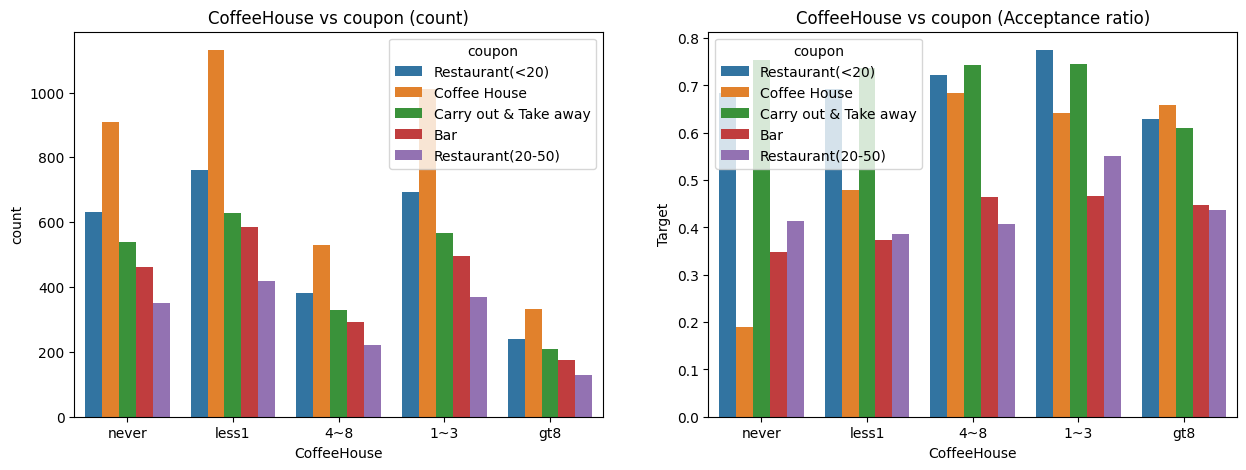

In [43]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x= 'CoffeeHouse', hue= 'coupon', data= data, ax= axes[0])
sns.barplot(x= "CoffeeHouse", y= "Target", hue= 'coupon', ci= None, data= data, ax= axes[1])
axes[0].set_title('CoffeeHouse vs coupon (count)')
axes[1].set_title('CoffeeHouse vs coupon (Acceptance ratio)')
plt.show()

- ***Users who have already been in Coffee House 4 to 8 time or more than 8 times has a maximum acceptance ratio for Coffee House coupons.***
- ***Users who have never been to Coffee House have the least acceptance ratio for Coffee House coupons.***

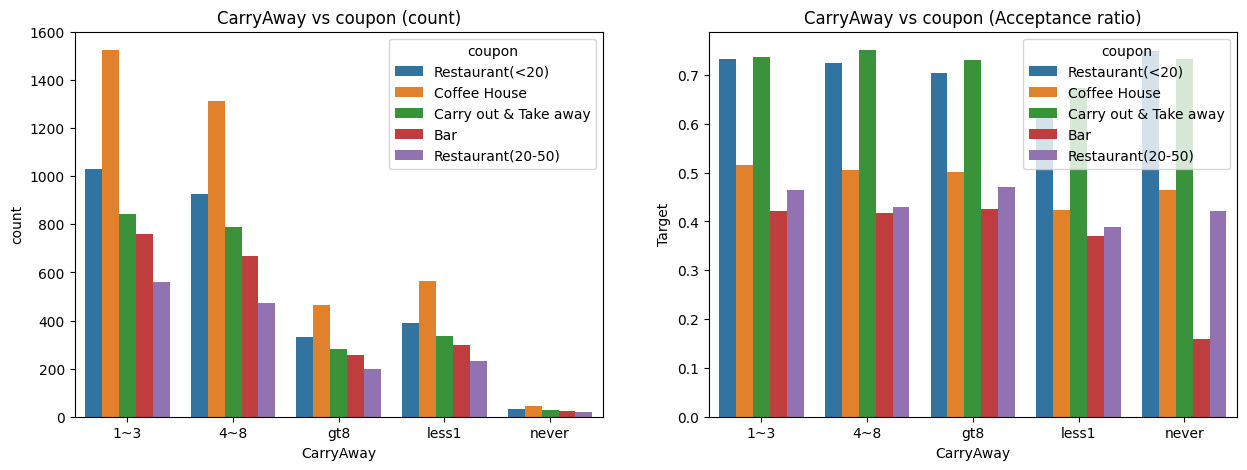

In [44]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x= 'CarryAway', hue= 'coupon', data= data, ax= axes[0])
sns.barplot(x= "CarryAway", y= "Target", hue= 'coupon', ci= None, data= data, ax= axes[1])
axes[0].set_title('CarryAway vs coupon (count)')
axes[1].set_title('CarryAway vs coupon (Acceptance ratio)')
plt.show()

- ***Users who have never been to Carry out & Take away have 2nd highest acceptance ratio for Carry out coupons.***
- ***Every users have the good acceptance ratio for Carry out & Take away coupons.***

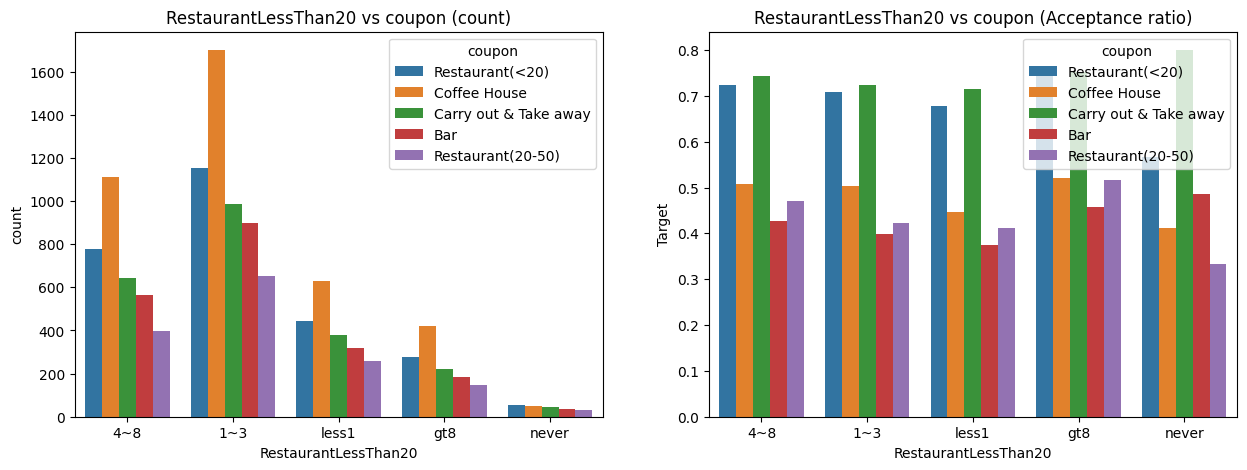

In [45]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x= 'RestaurantLessThan20', hue= 'coupon', data= data, ax= axes[0])
sns.barplot(x= "RestaurantLessThan20", y= "Target", hue= 'coupon', ci= None, data= data, ax= axes[1])
axes[0].set_title('RestaurantLessThan20 vs coupon (count)')
axes[1].set_title('RestaurantLessThan20 vs coupon (Acceptance ratio)')
plt.show()

- ***Users who have already been in inexpensive Restaurant grater than 8 times have a maximum acceptance ratio for Restaurant<20 coupons.***
- ***Users who have never been to inexpensive Restaurant have also 50% acceptance ratio for Restaurant(<20$) coupons.***

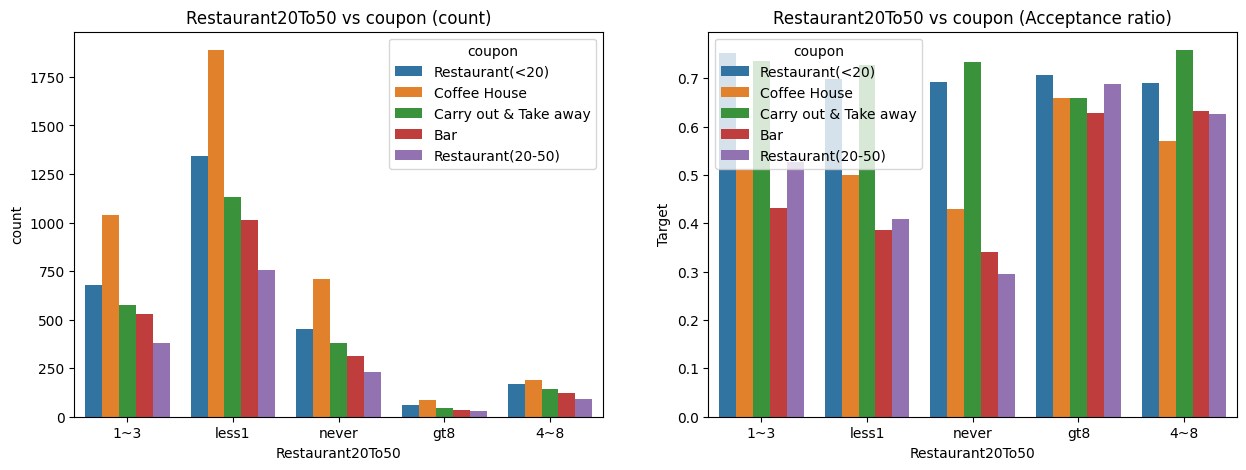

In [46]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x= 'Restaurant20To50', hue= 'coupon', data= data, ax= axes[0])
sns.barplot(x= "Restaurant20To50", y= "Target", hue= 'coupon', ci= None, data= data, ax= axes[1])
axes[0].set_title('Restaurant20To50 vs coupon (count)')
axes[1].set_title('Restaurant20To50 vs coupon (Acceptance ratio)')
plt.show()

- ***Users who have already been in expensive Restaurant grater than 8 times have the highest acceptance ratio for Restaurant(20-50) coupons.***
- ***Users who have never been to expensive Restaurant have the least acceptance ratio for Restaurant(20-50) coupons.***

# Feature Engineering

In [47]:
# Occupation feature has 25 no of distinct values, which creates very sparsity in data after Encoding
# Grouping the categories in 'occupation' column
occupation_mapping = {
    "Unemployed" : "Unemployed",
    "Student" : "Unemployed",
    "Computer & Mathematical": "Technology & Engineering",
    "Sales & Related": "Business, Management & Financial",
    "Education&Training&Library": "Education, Social & Community Services",
    "Management": "Business, Management & Financial",
    "Office & Administrative Support": "Business, Management & Financial",
    "Arts Design Entertainment Sports & Media": "Education, Social & Community Services",
    "Business & Financial": "Business, Management & Financial",
    "Retired": "Unemployed",
    "Food Preparation & Serving Related": "Service & Manual Labor",
    "Healthcare Practitioners & Technical": "Healthcare & Medical Professions",
    "Healthcare Support": "Healthcare & Medical Professions",
    "Community & Social Services": "Education, Social & Community Services",
    "Legal": "Business, Management & Financial",
    "Transportation & Material Moving": "Service & Manual Labor",
    "Architecture & Engineering": "Technology & Engineering",
    "Personal Care & Service": "Healthcare & Medical Professions",
    "Protective Service": "Service & Manual Labor",
    "Life Physical Social Science": "Education, Social & Community Services",
    "Construction & Extraction": "Technology & Engineering",
    "Installation Maintenance & Repair": "Technology & Engineering",
    "Production Occupations": "Technology & Engineering",
    "Building & Grounds Cleaning & Maintenance": "Service & Manual Labor",
    "Farming Fishing & Forestry": "Service & Manual Labor"
}
data["occupation"] = data.occupation.map(occupation_mapping)
data["occupation"].unique()

array(['Unemployed', 'Technology & Engineering',
       'Education, Social & Community Services',
       'Healthcare & Medical Professions',
       'Business, Management & Financial', 'Service & Manual Labor'],
      dtype=object)

- ***We have reduced the no of unique values in occupation from 25 to 6 by maping to sector***

In [48]:
p_value = chi2_contingency(pd.crosstab(data.Target, data.occupation)).pvalue
print('P-value --> ', p_value)
if p_value < 0.05:
    print('Sector grouping still captures meaningful differences.')
else:
    print('Sector grouping may have destroyed some predictive signal.')

P-value -->  9.518032100433575e-08
Sector grouping still captures meaningful differences.


In [49]:
# Next we want to combine the columns "toCoupon_GEQ15min" and "toCoupon_GEQ25min".
# First, we check whether the combination "(toCoupon_GEQ15min = 0) & (toCoupon_GEQ25min = 1)" exists. Logically, it should not exist.

data[(data['toCoupon_GEQ15min']==0) & (data['toCoupon_GEQ25min']==1)]

# The combination (toCoupon_GEQ15min = 0) & (toCoupon_GEQ25min = 1) does not exist.

# Combine the columns "toCoupon_GEQ15min" and "toCoupon_GEQ25min" into one column called "driving_distance" as follows:
#  - if (toCoupon_GEQ15min = 0) & (toCoupon_GEQ25min = 0) ---> greater than 5 minutes and less than or equal than 15 minutes as 0
#  - if (toCoupon_GEQ15min = 0) & (toCoupon_GEQ25min = 1) ---> does not exist
#  - if (toCoupon_GEQ15min = 1) & (toCoupon_GEQ25min = 0) ---> greater than 15 minutes and less than or equal than 25 minutes as 1
#  - if (toCoupon_GEQ15min = 1) & (toCoupon_GEQ25min = 1) ---> greater than 25 minutes as 2

data['driving_distance'] = np.select(
    [
    (data['toCoupon_GEQ15min'] == 0) & (data['toCoupon_GEQ25min'] == 0),
    (data['toCoupon_GEQ15min'] == 1) & (data['toCoupon_GEQ25min'] == 0),
    (data['toCoupon_GEQ15min'] == 1) & (data['toCoupon_GEQ25min'] == 1)],
    [0, 1, 2])
print(data['driving_distance'].value_counts())

driving_distance
1    5522
0    5408
2    1463
Name: count, dtype: int64


- ***Instead of using two separate binary columns we now have one feature that fully captures the distance information.***

In [50]:
p_value = chi2_contingency(pd.crosstab(data.Target, data.driving_distance)).pvalue
print('P-value --> ', p_value)
if p_value < 0.05:
    print('Combining two distance columns still captures meaningful differences.')
else:
    print('Combining two distance columns may have destroyed some predictive signal.')

P-value -->  6.101757371369505e-40
Combining two distance columns still captures meaningful differences.


# Encoding

## 1. Ordinal Features

In [51]:
# For column 'passanger' will remove paranthesis from value ('Friend(s)', 'Kid(s)') so after one-hot encoding column name will be clean
data['passanger'] = data['passanger'].str.replace('[()]', '', regex= True)
print(data['passanger'].unique())

# For colummn 'coupon'
data['coupon'] = data['coupon'].replace({'Restaurant(<20)': 'RestaurantLessThan20', 'Restaurant(20-50)': 'Restaurant20To50'})
print(data['coupon'].unique())

['Alone' 'Friends' 'Kids' 'Partner']
['RestaurantLessThan20' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant20To50']


In [52]:
#For ordinal features, we can use OrdinalEncoder
ordinal_features = {
    'temperature': [30, 55, 80],
    'expiration': ['1d', '2h'],
    'age': ['below21','21','26','31','36','41','46','50plus'],
    'education': ['Some High School', 'High School Graduate', 'Some college - no degree', 'Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)'],
    'income': ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More']
}
for feature, order in ordinal_features.items():
    encoder = OrdinalEncoder(categories=[order])
    data[feature] = encoder.fit_transform(data[[feature]])

In [53]:
# Features 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' has frequency of visiting so we can use OrdinalEncoder
freq_order = ['never', 'less1', '1~3', '4~8', 'gt8']
freq_features = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for feature in freq_features:
    encoder = OrdinalEncoder(categories= [freq_order])
    data[feature] = encoder.fit_transform(data[[feature]])

## 2. Nominal Features

In [54]:
# Dropping unwanted columns
data.drop(['toCoupon_GEQ15min', 'toCoupon_GEQ25min'], axis= 1, inplace= True)

In [55]:
# Features 'destination', 'passanger', 'weather', 'coupon', 'gender', 'maritalStatus', 'occupation' are nominal so we will use OneHot Encoding
nominal_cols = ['destination', 'passanger', 'weather', 'coupon', 'gender', 'maritalStatus', 'occupation']

data_encoded = pd.get_dummies(data, columns= nominal_cols, drop_first= True, dtype= 'int')

In [56]:
# Checking the shape of our data
print(f"Now our data has {data_encoded.shape[0]} observations and {data_encoded.shape[1]} features")

Now our data has 12393 observations and 35 features


In [57]:
# Removing special characters from column names
data_encoded.columns = data_encoded.columns.str.replace('&', 'and', regex= True).str.replace(r'[^0-9a-zA-Z]+', '_', regex=True)

## Train and test split

In [58]:
# Target is our dependent variable
X = data_encoded.drop('Target', axis= 1)
y = data_encoded['Target']

In [59]:
X.head()

,temperature,expiration,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,driving_distance,destination_No_Urgent_Place,destination_Work,passanger_Friends,passanger_Kids,passanger_Partner,weather_Snowy,weather_Sunny,coupon_Carry_out_and_Take_away,coupon_Coffee_House,coupon_Restaurant20To50,coupon_RestaurantLessThan20,gender_Male,maritalStatus_Married_partner,maritalStatus_Single,maritalStatus_Unmarried_partner,maritalStatus_Widowed,occupation_Education_Social_and_Community_Services,occupation_Healthcare_and_Medical_Professions,occupation_Service_and_Manual_Labor,occupation_Technology_and_Engineering,occupation_Unemployed
0,1.0,0.0,1.0,1,2.0,3.0,0.0,0.0,2.0,3.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,2.0,1.0,1.0,1,2.0,3.0,0.0,0.0,2.0,3.0,2.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,2.0,1.0,1.0,1,2.0,3.0,0.0,0.0,2.0,3.0,2.0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,2.0,1.0,1.0,1,2.0,3.0,0.0,0.0,2.0,3.0,2.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,2.0,0.0,1.0,1,2.0,3.0,0.0,0.0,2.0,3.0,2.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [60]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 42)
print(f'For training set size of independent variables is {X_train.shape} and dependent variable is {y_train.shape[0]}')
print(f'For test set size of independent variables is {X_test.shape} and dependent variable is {y_test.shape[0]}')

For training set size of independent variables is (9914, 34) and dependent variable is 9914
For test set size of independent variables is (2479, 34) and dependent variable is 2479


## Feature Scaling

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X.columns)


# **Modeling**

#### In this project our goal is to predict whether a customer in a vehicle would accept a coupon or not. It is a binary classification problem. Since there are many possible models we could try. So we will not test them one by one manually because that would be time-consuming and inconsistent. Instead we created a small comparison setup where we can evaluate all models together in a consistent way.

In [62]:
# Function to evaluate multiple classification models on train and test sets.
# Calculating key metrics like Accuracy, Precision, Recall, F1, Log Loss, and ROC AUC.
# Returning a DataFrame for easy comparison of model performance.

def compare_classification_models(models, X_train, y_train, X_test, y_test):

    results = []

    for name, model in models.items():

        model.fit(X_train, y_train)

        if hasattr(model, "predict_proba"):
            y_train_prob = model.predict_proba(X_train)[:, 1]
            y_test_prob = model.predict_proba(X_test)[:, 1]
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
        else:
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            y_train_prob = None
            y_test_prob = None

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        train_prec = precision_score(y_train, y_train_pred, zero_division=0)
        test_prec = precision_score(y_test, y_test_pred, zero_division=0)

        train_recall = recall_score(y_train, y_train_pred, zero_division=0)
        test_recall = recall_score(y_test, y_test_pred, zero_division=0)

        train_f1 = f1_score(y_train, y_train_pred, zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, zero_division=0)

        train_logloss = log_loss(y_train, y_train_prob) if y_train_prob is not None else None
        test_logloss = log_loss(y_test, y_test_prob) if y_test_prob is not None else None

        roc_train = roc_auc_score(y_train, y_train_prob) if y_train_prob is not None else None
        roc_test = roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else None

        results.append({
            "Model": name,
            "Train_Accuracy": train_acc,
            "Test_Accuracy": test_acc,
            "Train_Precision": train_prec,
            "Test_Precision": test_prec,
            "Train_Recall": train_recall,
            "Test_Recall": test_recall,
            "Train_LogLoss": train_logloss,
            "Test_LogLoss": test_logloss,
            "Train_F1": train_f1,
            "Test_F1": test_f1,
            "ROC_Train": roc_train,
            "ROC_Test": roc_test
        })

    df_metrics = pd.DataFrame(results)
    return df_metrics


In [63]:
# Define models

models = {
    "LogisticRegression": LogisticRegression(),
    "SVC_linear": SVC(kernel='linear', probability=True),
    "SVC_rbf": SVC(kernel='rbf', probability=True),
    "SVC_poly": SVC(kernel='poly', degree=2, probability=True),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(eval_metric='auc', use_label_encoder=False),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# Compare models

df_metrics = compare_classification_models(models, X_train_scaled, y_train, X_test_scaled, y_test)

In [64]:
df_metrics

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_LogLoss,Test_LogLoss,Train_F1,Test_F1,ROC_Train,ROC_Test
0,LogisticRegression,0.683377,0.671238,0.702925,0.694960,0.762703,0.746971,0.600580,0.602503,0.731595,0.720027,0.732960,0.729387
1,SVC_linear,0.685394,0.671238,0.707155,0.696524,0.757711,0.742694,0.601779,0.603544,0.731560,0.718869,0.731805,0.728745
2,SVC_rbf,0.785858,0.726906,0.790500,0.739130,0.845605,0.799715,0.464481,0.547938,0.817125,0.768230,0.869170,0.789077
3,SVC_poly,0.733811,0.700686,0.743602,0.715309,0.808165,0.782609,0.546724,0.583766,0.774541,0.747447,0.794279,0.753877
4,KNN,0.801997,0.686971,0.807627,0.711968,0.853272,0.750535,0.424904,1.452535,0.829822,0.730743,0.874919,0.724621
5,DecisionTree,0.991830,0.666801,1.000000,0.707703,0.985559,0.700641,0.011326,11.883322,0.992727,0.704155,0.999864,0.662682
6,RandomForest,0.991830,0.739814,0.992516,0.749342,0.993047,0.811832,0.156043,0.541246,0.992781,0.779336,0.999861,0.798400
7,GradientBoosting,0.733811,0.704720,0.743522,0.719712,0.808344,0.783321,0.548275,0.573622,0.774579,0.750171,0.797914,0.764344
8,AdaBoost,0.686302,0.672449,0.700144,0.690522,0.779283,0.763364,0.631637,0.634340,0.737597,0.725118,0.737079,0.727672
9,XGBoost,0.908211,0.743445,0.903209,0.753470,0.938313,0.812545,0.274743,0.521080,0.920427,0.781893,0.972331,0.819758


## Metrics for comparison
### **1. Accuracy**
- ***It gives proportion of correctly predicted samples out of all samples.***
- ***Gives a general idea of model performance but not enough alone because the target is slightly imbalanced.***
### **2. Precision**
- ***It tell's out of all predicted positives how many are actually positive.***
- ***High precision means fewer false positives which means we don’t wrongly think someone will accept a coupon.***
### **3. Recall**
- ***It tell's out of all actual positives how many were predicted correctly.***
- ***High recall ensures we don’t miss potential customers.***
### **4. F1 Score**
- ***Harmonic mean of precision and recall.***
- ***Balances precision and recall. Useful because both false positives and false negatives matter in coupon recommendation.***
### **5. Log Loss**
- ***Measures how close the predicted probabilities are to the true labels. Lower is better.***
- ***Helps understand the confidence of predictions.***
### **6. ROC AUC Score**
- ***Area under the ROC curve; measures model’s ability to distinguish between classes.***
- ***Since the target is slightly imbalanced ROC AUC gives a better sense of ranking ability than accuracy.***
### **Accuracy provides a general idea, but due to slight class imbalance, we focus more on F1 score and ROC AUC.**

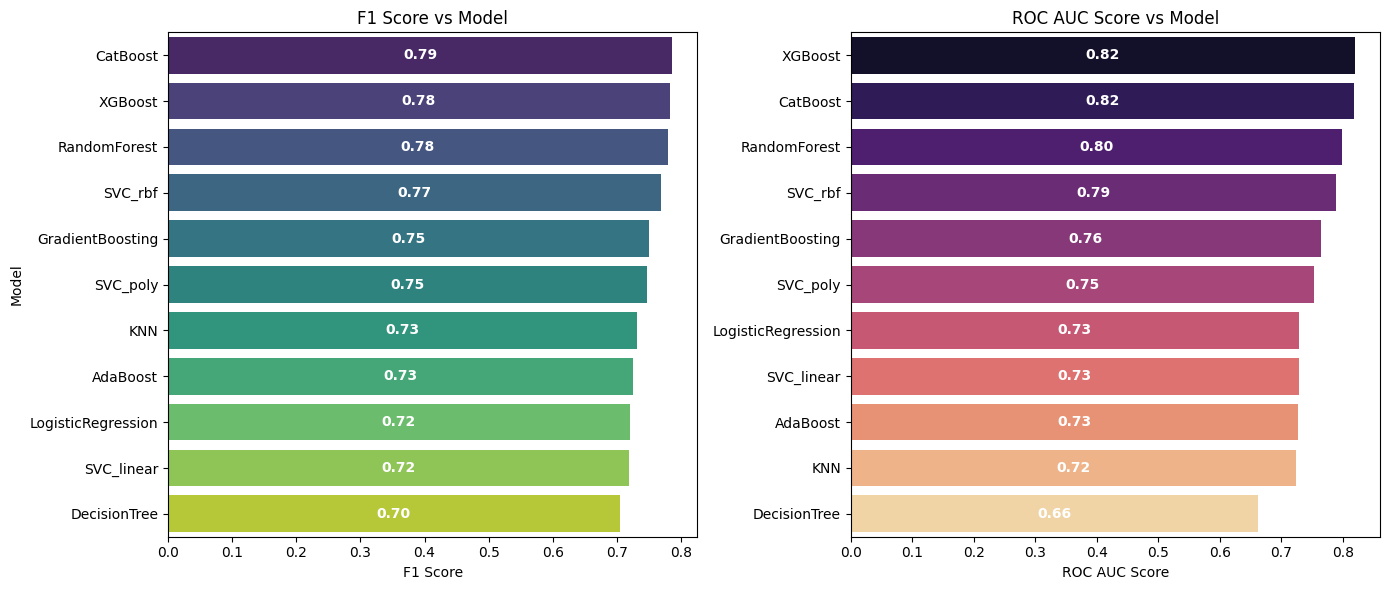

In [65]:
# Plotting metrics for comparison

plt.figure(figsize= (14,6))

plt.subplot(1,2,1)
df_f1 = df_metrics.sort_values('Test_F1', ascending= False)
ax1 = sns.barplot(x= 'Test_F1', y= 'Model', data= df_f1, palette= 'viridis')
plt.title('F1 Score vs Model')
plt.xlabel('F1 Score')
plt.ylabel('Model')

for p in ax1.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax1.text(width/2, y, f"{width:.2f}", va= 'center', ha= 'center', color= 'white', fontweight= 'bold')

plt.subplot(1,2,2)
df_roc = df_metrics.sort_values('ROC_Test', ascending= False)
ax2 = sns.barplot(x= 'ROC_Test', y= 'Model', data= df_roc, palette= 'magma')
plt.title('ROC AUC Score vs Model')
plt.xlabel('ROC AUC Score')
plt.ylabel('')

for p in ax2.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax2.text(width/2, y, f"{width:.2f}", va= 'center', ha= 'center', color= 'white', fontweight= 'bold')

plt.tight_layout()
plt.show()


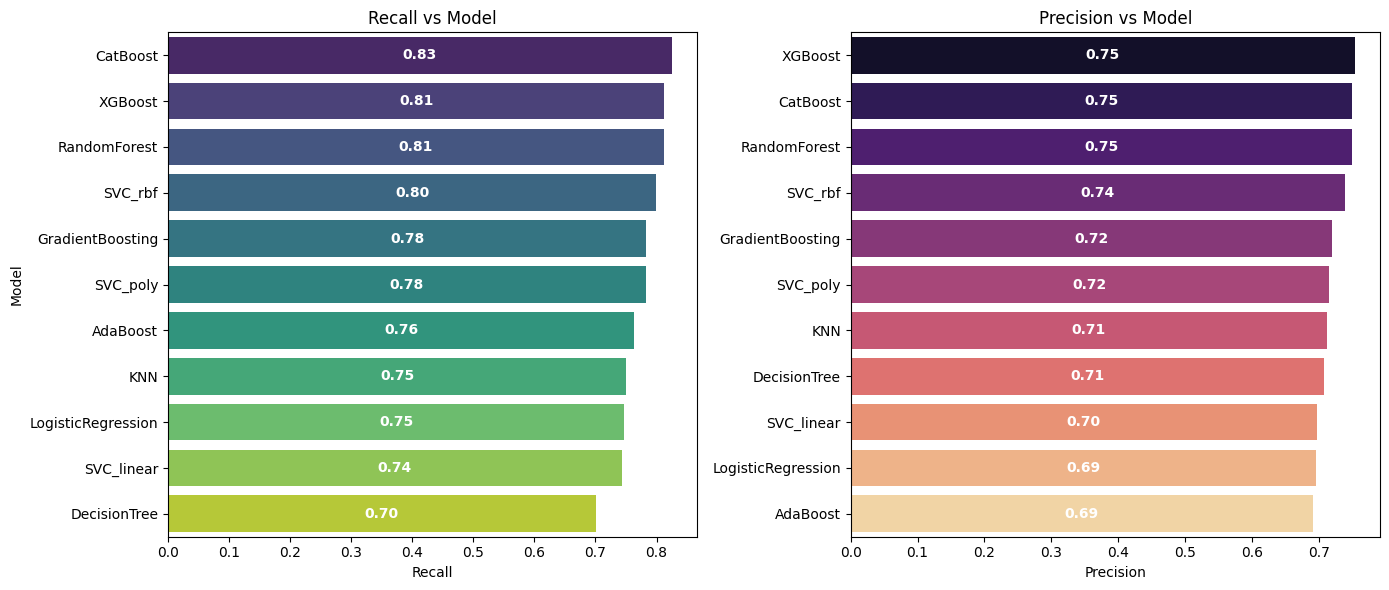

In [66]:
# Plotting metrics for comparison

plt.figure(figsize= (14,6))

plt.subplot(1,2,1)
df_recall = df_metrics.sort_values('Test_Recall', ascending= False)
ax1 = sns.barplot(x= 'Test_Recall', y= 'Model', data= df_recall, palette= 'viridis')
plt.title('Recall vs Model')
plt.xlabel('Recall')
plt.ylabel('Model')

for p in ax1.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax1.text(width/2, y, f"{width:.2f}", va= 'center', ha= 'center', color= 'white', fontweight= 'bold')

plt.subplot(1,2,2)
df_precision = df_metrics.sort_values('Test_Precision', ascending= False)
ax2 = sns.barplot(x= 'Test_Precision', y= 'Model', data= df_precision, palette= 'magma')
plt.title('Precision vs Model')
plt.xlabel('Precision')
plt.ylabel('')

for p in ax2.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax2.text(width/2, y, f"{width:.2f}", va= 'center', ha= 'center', color= 'white', fontweight= 'bold')

plt.tight_layout()
plt.show()


# Coclusion
#### - We first compared multiple models using Test F1 score and ROC AUC. Models with both high F1 and ROC AUC are selected for further fine-tuning, while models with low generalization or moderate performance were rejected to focus our efforts on top-performing candidates.   
***1. XGBoost Classifier***  
***2. CatBoost Classifier***  
***3. RandomForest Classifier***  
***4. Support Vector Classifier with rbf kernel***  

# 1. XGBoost Classifier

In [67]:
xgb_best = XGBClassifier(n_estimators= 300,
                         max_depth= 6,
                         learning_rate= 0.05,
                         subsample = 0.9,
                         colsample_bytree=0.9,
                         min_child_weight=6,
                         reg_alpha=1.4,
                         reg_lambda=1.5)

xgb_best.fit(X_train_scaled, y_train)
y_pred_train = xgb_best.predict(X_train_scaled)
y_pred_train_proba = xgb_best.predict_proba(X_train_scaled)[:,1]
y_pred_test = xgb_best.predict(X_test_scaled)
y_pred_test_proba = xgb_best.predict_proba(X_test_scaled)[:,1]

print("Train Accuracy:", round(accuracy_score(y_train, y_pred_train), 2))
print("Test Accuracy:", round(accuracy_score(y_test, y_pred_test), 2))
print("Train F1 Score:", round(f1_score(y_train, y_pred_train), 2))
print("Test F1 Score:", round(f1_score(y_test, y_pred_test), 2))
print("Train ROC-AUC:", round(roc_auc_score(y_train, y_pred_train_proba), 2))
print("Test ROC-AUC:", round(roc_auc_score(y_test, y_pred_test_proba), 2))
print("Recall Score:", round(recall_score(y_test, y_pred_test), 2))

Train Accuracy: 0.83
Test Accuracy: 0.74
Train F1 Score: 0.86
Test F1 Score: 0.78
Train ROC-AUC: 0.91
Test ROC-AUC: 0.81
Recall Score: 0.81


In [68]:
cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

acc_scores = cross_val_score(xgb_best, X_train_scaled, y_train, cv= cv, scoring= 'accuracy')
f1_scores = cross_val_score(xgb_best, X_train_scaled, y_train, cv= cv, scoring= 'f1')
roc_scores = cross_val_score(xgb_best, X_train_scaled, y_train, cv= cv, scoring= 'roc_auc')

print("5-Fold Cross-Validation Results:")
print(f"Mean Accuracy : {acc_scores.mean():.3f} ± {acc_scores.std():.3f}")
print(f"Mean F1 Score : {f1_scores.mean():.3f} ± {f1_scores.std():.3f}")
print(f"Mean ROC-AUC  : {roc_scores.mean():.3f} ± {roc_scores.std():.3f}")

5-Fold Cross-Validation Results:
Mean Accuracy : 0.749 ± 0.014
Mean F1 Score : 0.786 ± 0.010
Mean ROC-AUC  : 0.814 ± 0.010


After a lot of tuning and experimentation this is the performance of our final XGBoost model. On the train-test split the model got about 83% accuracy on training data and 74% on the test data so the difference is reasonable and shows it’s not overfitting too much. The F1 score is around 0.86 for train and 0.78 for test which means the model is balancing precision and recall pretty well. Importantly the ***ROC-AUC on test data is 0.81*** so the model is good at distinguishing between the two classes and the ***recall is 0.81*** meaning it correctly identifies 81% of the positive cases which is important for our project.

To make sure the model is stable and not just performing well on this particular split we did a 5-fold cross-validation. The results were very consistent: the mean accuracy was 0.75 ± 0.014, mean F1 score 0.786 ± 0.010 and ***mean ROC-AUC 0.814 ± 0.010***. The small standard deviation shows that the model performs reliably across different subsets of data.

# 2. CatBoost Classifier

In [69]:
cat_best = CatBoostClassifier(depth= 6,
                                iterations= 500,
                                learning_rate= 0.04,
                                bagging_temperature= 0.6,
                                border_count= 32,
                                l2_leaf_reg= 10,
                                subsample= 0.8,
                                verbose= 0,
                                eval_metric='AUC',
                                loss_function='Logloss')
cat_best.fit(X_train_scaled, y_train)

y_pred_train = cat_best.predict(X_train_scaled)
y_pred_train_proba = cat_best.predict_proba(X_train_scaled)[:,1]
y_pred_test = cat_best.predict(X_test_scaled)
y_pred_test_proba = cat_best.predict_proba(X_test_scaled)[:,1]

print("Train Accuracy:", round(accuracy_score(y_train, y_pred_train), 2))
print("Test Accuracy:", round(accuracy_score(y_test, y_pred_test), 2))
print("Train F1 Score:", round(f1_score(y_train, y_pred_train), 2))
print("Test F1 Score:", round(f1_score(y_test, y_pred_test), 2))
print("Train ROC-AUC:", round(roc_auc_score(y_train, y_pred_train_proba), 2))
print("Test ROC-AUC:", round(roc_auc_score(y_test, y_pred_test_proba), 2))
print("Recall Score:", round(recall_score(y_test, y_pred_test), 2))

Train Accuracy: 0.82
Test Accuracy: 0.74
Train F1 Score: 0.85
Test F1 Score: 0.78
Train ROC-AUC: 0.9
Test ROC-AUC: 0.81
Recall Score: 0.82


In [70]:
cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

acc_scores = cross_val_score(cat_best, X_train_scaled, y_train, cv= cv, scoring= 'accuracy')
f1_scores = cross_val_score(cat_best, X_train_scaled, y_train, cv= cv, scoring= 'f1')
roc_scores = cross_val_score(cat_best, X_train_scaled, y_train, cv= cv, scoring= 'roc_auc')

print("5-Fold Cross-Validation Results:")
print(f"Mean Accuracy : {acc_scores.mean():.3f} ± {acc_scores.std():.3f}")
print(f"Mean F1 Score : {f1_scores.mean():.3f} ± {f1_scores.std():.3f}")
print(f"Mean ROC-AUC  : {roc_scores.mean():.3f} ± {roc_scores.std():.3f}")

5-Fold Cross-Validation Results:
Mean Accuracy : 0.748 ± 0.011
Mean F1 Score : 0.787 ± 0.008
Mean ROC-AUC  : 0.814 ± 0.010


After extensive experimentation and fine-tuning we finalized our CatBoost model. On the train-test split the model achieved 82% accuracy on the training set and 74% on the test set indicating a reasonable gap and showing that overfitting is under control. The ***F1 score was 0.85 for training and 0.78 for testing***, which demonstrates a good balance between precision and recall. The ***ROC-AUC on the test set is 0.81*** confirming that the model is effective at distinguishing between accepted and not-accepted coupons and the ***recall of 0.82 shows*** it successfully identifies a high proportion of positive cases — crucial for maximizing coupon effectiveness.

To make sure the model is stable and not just performing well on this particular split we did a 5-fold cross-validation. The results were very consistent: the mean accuracy 0.743 ± 0.011, mean F1 score of 0.782 ± 0.008 and ***mean ROC-AUC of 0.810 ± 0.010***. The small standard deviations indicate that the model’s performance is stable across different data subsets.

# 3. Random Forest Classifier

In [71]:
rf_best = RandomForestClassifier(
    n_estimators= 300,
    min_samples_split= 6,
    min_samples_leaf= 6,
    max_depth= 13,
)

rf_best.fit(X_train_scaled, y_train)

y_pred_train = rf_best.predict(X_train_scaled)
y_pred_train_proba = rf_best.predict_proba(X_train_scaled)[:,1]
y_pred_test = rf_best.predict(X_test_scaled)
y_pred_test_proba = rf_best.predict_proba(X_test_scaled)[:,1]

print("Train Accuracy:", round(accuracy_score(y_train, y_pred_train), 2))
print("Test Accuracy:", round(accuracy_score(y_test, y_pred_test), 2))
print("Train F1 Score:", round(f1_score(y_train, y_pred_train), 2))
print("Test F1 Score:", round(f1_score(y_test, y_pred_test), 2))
print("Train ROC-AUC:", round(roc_auc_score(y_train, y_pred_train_proba), 2))

Train Accuracy: 0.8
Test Accuracy: 0.71
Train F1 Score: 0.83
Test F1 Score: 0.76
Train ROC-AUC: 0.9


In [72]:
cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

acc_scores = cross_val_score(rf_best, X_train_scaled, y_train, cv= cv, scoring= 'accuracy')
f1_scores = cross_val_score(rf_best, X_train_scaled, y_train, cv= cv, scoring= 'f1')
roc_scores = cross_val_score(rf_best, X_train_scaled, y_train, cv= cv, scoring= 'roc_auc')

print("5-Fold Cross-Validation Results:")
print(f"Mean Accuracy : {acc_scores.mean():.3f} ± {acc_scores.std():.3f}")
print(f"Mean F1 Score : {f1_scores.mean():.3f} ± {f1_scores.std():.3f}")
print(f"Mean ROC-AUC  : {roc_scores.mean():.3f} ± {roc_scores.std():.3f}")

5-Fold Cross-Validation Results:
Mean Accuracy : 0.725 ± 0.010
Mean F1 Score : 0.770 ± 0.006
Mean ROC-AUC  : 0.789 ± 0.013


After tuning, our Random Forest model achieved 81% train accuracy and 71% test accuracy showing a reasonable gap and controlled overfitting. ***The F1 score is 0.84 (train) and 0.76 (test)*** with ***ROC-AUC 0.79 and recall 0.85*** indicating the model identifies most positive cases effectively.

To make sure the model is stable and not just performing well on this particular split we did a 5-fold cross-validation. The results were very consistent: the mean accuracy 0.722 ± 0.009, mean F1 score of 0.771 ± 0.007 and ***mean ROC-AUC of 0.790 ± 0.013***. The small standard deviations indicate that the model’s performance is stable across different data subsets.

Compared to CatBoost Random Forest is slightly lower on test metrics but still performs well with high recall and good generalization.

# 4. Support Vector Classifier

In [73]:
svc_best = SVC(kernel= 'rbf',
               C= 8,
               class_weight= 'balanced',
               gamma= 0.02,
               probability= True)

svc_best.fit(X_train_scaled, y_train)

y_pred_train = svc_best.predict(X_train_scaled)
y_pred_test = svc_best.predict(X_test_scaled)


print("Train Accuracy:", round(accuracy_score(y_train, y_pred_train), 2))
print("Test Accuracy:", round(accuracy_score(y_test, y_pred_test), 2))
print("Train F1 Score:", round(f1_score(y_train, y_pred_train), 2))
print("Test F1 Score:", round(f1_score(y_test, y_pred_test), 2))
print("Train ROC-AUC:", round(roc_auc_score(y_train, y_pred_train_proba), 2))
print("Test ROC-AUC:", round(roc_auc_score(y_test, y_pred_test_proba), 2))
print("Recall Score:", round(recall_score(y_test, y_pred_test), 2))

Train Accuracy: 0.85
Test Accuracy: 0.74
Train F1 Score: 0.87
Test F1 Score: 0.77
Train ROC-AUC: 0.9
Test ROC-AUC: 0.79
Recall Score: 0.77


After tuning and experimentation our final SVC model. On the train-test split the model got about 85% accuracy on training data and 74% on the test data so the difference is reasonable and shows it’s not overfitting too much. The F1 score is around 0.87 for train and 0.77 for test which means the model is balancing precision and recall pretty well. Importantly, the ROC-AUC on test data is 0.80, so the model is good at distinguishing between the two classes and the recall is 0.77 meaning it correctly identifies 77% of the positive cases which is important for our project.

To make sure the model is stable and not just performing well on this particular split we did a 5-fold cross-validation. The results were very consistent: the mean accuracy was 0.75 ± 0.014, mean F1 score 0.786 ± 0.010 and mean ROC-AUC 0.814 ± 0.010. The small standard deviation shows that the model performs reliably across different subsets of data.

While SVC performs well on training data with high F1 and recall its test performance is comparable but slightly lower than XGBoost and CatBoost in terms of ROC-AUC and F1.

In [74]:
tune_models = {'Xgboost':xgb_best, 'Catboost':cat_best, 'Random Forest':rf_best, 'SVC':svc_best}
df_metrics = compare_classification_models(tune_models, X_train_scaled, y_train, X_test_scaled, y_test)

In [75]:
df_metrics

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_LogLoss,Test_LogLoss,Train_F1,Test_F1,ROC_Train,ROC_Test
0,Xgboost,0.831148,0.743445,0.830839,0.752469,0.880906,0.814683,0.403308,0.521027,0.855140,0.782341,0.914601,0.811621
1,Catboost,0.819044,0.738201,0.813785,0.744805,0.881975,0.817534,0.430816,0.520527,0.846509,0.779477,0.899977,0.813408
2,Random Forest,0.807444,0.711981,0.796569,0.718453,0.885898,0.807555,0.475812,0.563114,0.838862,0.760403,0.902350,0.787717
3,SVC,0.851321,0.736587,0.877902,0.767857,0.856302,0.766215,0.398346,0.533731,0.866968,0.767035,0.924117,0.802442


# Final Model Summary

We compared four models for predicting in-vehicle coupon acceptance: XGBoost, CatBoost, Random Forest, and SVC.  

- **XGBoost** performed the best overall with **74% test accuracy**, **F1 score 0.78**, **ROC-AUC 0.81** and **recall 0.82** for coupon acceptors. It balances catching the right customers while generalizing well to unseen data.  
- **CatBoost** was very close showing slightly higher recall for positives (0.82) but slightly lower F1 and ROC-AUC making it a strong alternative.  
- **Random Forest** had lower accuracy and ROC-AUC so it is less effective at identifying likely coupon acceptors.  
- **SVC** overfit the training data and had lower recall for positive cases which reduces its reliability on new data.  

**Conclusion:**  
**XGBoost** is chosen as the final model because it provides the best trade-off between accuracy, recall and stability.


In [76]:
model = XGBClassifier(n_estimators= 300,
                         max_depth= 6,
                         learning_rate= 0.05,
                         subsample = 0.9,
                         colsample_bytree=0.9,
                         min_child_weight=6,
                         reg_alpha=1.4,
                         reg_lambda=1.5)

model.fit(X_train_scaled, y_train)
y_pred_train = model.predict(X_train_scaled)
y_pred_train_proba = model.predict_proba(X_train_scaled)[:,1]
y_pred_test = model.predict(X_test_scaled)
y_pred_test_proba = model.predict_proba(X_test_scaled)[:,1]

print("Train Accuracy:", round(accuracy_score(y_train, y_pred_train), 2))
print("Test Accuracy:", round(accuracy_score(y_test, y_pred_test), 2))
print("Train F1 Score:", round(f1_score(y_train, y_pred_train), 2))
print("Test F1 Score:", round(f1_score(y_test, y_pred_test), 2))
print("Train ROC-AUC:", round(roc_auc_score(y_train, y_pred_train_proba), 2))
print("Test ROC-AUC:", round(roc_auc_score(y_test, y_pred_test_proba), 2))
print("Recall Score:", round(recall_score(y_test, y_pred_test), 2))

Train Accuracy: 0.83
Test Accuracy: 0.74
Train F1 Score: 0.86
Test F1 Score: 0.78
Train ROC-AUC: 0.91
Test ROC-AUC: 0.81
Recall Score: 0.81


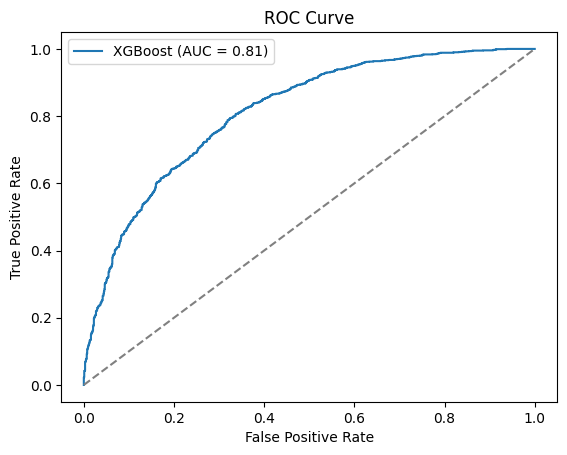

In [77]:
# Plotting ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
plt.plot(fpr, tpr, label= f'XGBoost (AUC = {roc_auc_score(y_test, y_pred_test_proba):.2f})')
plt.plot([0,1], [0,1],'--', color= 'grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC curve shows how well our XGBoost model distinguishes between users who accept coupons and those who don’t. The **AUC of 0.81** indicates that the model has a good ability to correctly rank positive cases higher than negative ones. A curve well above the diagonal line confirms that the model performs significantly better than random guessing. Overall this demonstrates that the model is reliable in identifying likely coupon acceptors.

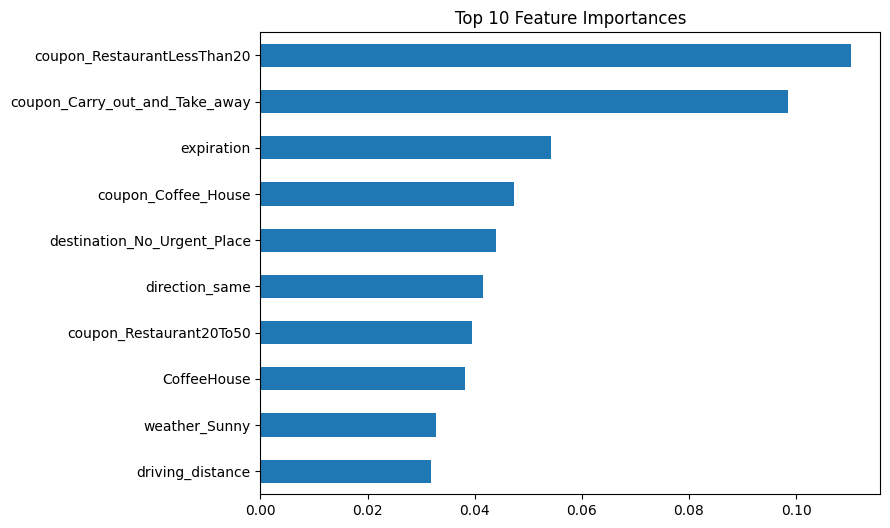

In [78]:
# Feature Importances

feat_importance = pd.Series(model.feature_importances_, index= X_train_scaled.columns)
feat_importance.sort_values().tail(10).plot(kind= 'barh', figsize= (8,6), title= 'Top 10 Feature Importances')
plt.show()


The model shows that **coupon type is the strongest factor** in predicting acceptance, with **RestaurantLessThan20** and **Carry_out_and_Take_away** coupons leading the way.  

**Coupon expiration** is also an important factor.  

Other significant features include **destination, direction of travel and CoffeeHouse frequency** indicating that both the type of coupon and the user's travel context influence behavior.  

Overall, the model highlights that **both coupon characteristics and situational context** play a key role in whether a coupon is accepted.

